In [1]:
import qiskit.tools.jupyter
from qiskit import IBMQ
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
from qiskit import execute
import numpy as np
import matplotlib.pyplot as plt
from qiskit.tools.visualization import circuit_drawer

In [2]:
IBMQ.save_account('ID',overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
print(provider)
provider.backends()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [3]:
device1 = provider.get_backend('ibmq_qasm_simulator')
device1

<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
devicename='ibmq_qasm_simulator'
device = provider.get_backend(devicename)

In [12]:
#%matplotlib inline
times=75
jobs = []
for i in range(4):
    qcs=[]
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0,1)
    qc.barrier()
    if i%2==0:
        qc.h(0)
    qc.s(1)
    qc.h(1)
    if i%4<=1:
        qc.t(1)
    else:
        qc.tdg(1)
    qc.h(1)
    qc.barrier()
    qc.measure([0, 1], [0, 1])
    circuit_drawer(qc, output='latex_source', style={'backgroundcolor': '#EEEEEE'})
    #qc.draw(output='mpl')
    for j in range(times):
        qcs.append(qc)
    job = execute(qcs, backend=device, shots=8192, optimization_level=0)
    #print(job.job_id())
    jobs.append(job)

In [13]:
for i in range(4):
    print(jobs[i].job_id())
    print(jobs[i].status())

6153e54142b4927cef9e920e
JobStatus.DONE
6153e543843af57346d6b567
JobStatus.DONE
6153e5452b538f17584bf185
JobStatus.DONE
6153e547ba830e390f4110ef
JobStatus.RUNNING


In [14]:
result = [[0 for i in range(4)]for i in range(4)]
for i in range(4):
    results = jobs[i].result()
    for j in range(len(results.results)):
        count=results.get_counts(j)
        for k,item in enumerate(count.values()):
            result[i][k]+=item

In [15]:
S = 0
for i in range(4):
    print((result[i][0]-result[i][1]-result[i][2]+result[i][3])/np.sum(result[i]))
    if i % 4 != 2:
        S+=(result[i][0]-result[i][1]-result[i][2]+result[i][3])/np.sum(result[i])
    else:
        S-=(result[i][0]-result[i][1]-result[i][2]+result[i][3])/np.sum(result[i])
print('IMB Q:',S)
print('Theory:',2*np.sqrt(2))

0.7069856770833334
0.7077799479166667
-0.7087532552083333
0.7055208333333334
IMB Q: 2.829039713541667
Theory: 2.8284271247461903


d:\users\admin\anaconda3\envs\qiskit\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


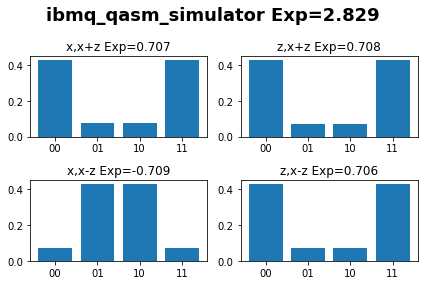

In [16]:
result=np.array(result)
fig, ax=plt.subplots(2,2)
titles=['x,x+z','z,x+z','x,x-z','z,x-z']
S=0
for i in range(4):
    ans=(result[i][0]-result[i][1]-result[i][2]+result[i][3])/np.sum(result[i])
    if i % 4 != 2:
        S+=ans
    else:
        S-=ans
    ans=round(ans,3)
    ax[i//2][i%2].bar(['00','01','10','11'],result[i]/np.sum(result[i]))
    ax[i//2][i%2].title.set_text(titles[i]+' Exp='+str(ans))
S=round(S,3)
fig.suptitle(devicename+' Exp='+str(S),fontsize=18,fontweight ="bold")
fig.tight_layout()
fig.savefig(devicename+"_prob.png")
fig.show()

d:\users\admin\anaconda3\envs\qiskit\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


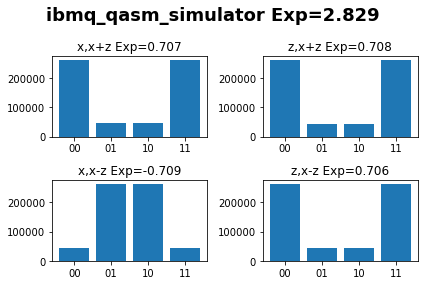

In [17]:
result=np.array(result)
fig, ax=plt.subplots(2,2)
titles=['x,x+z','z,x+z','x,x-z','z,x-z']
S=0
for i in range(4):
    ans=(result[i][0]-result[i][1]-result[i][2]+result[i][3])/np.sum(result[i])
    if i % 4 != 2:
        S+=ans
    else:
        S-=ans
    ans=round(ans,3)
    ax[i//2][i%2].bar(['00','01','10','11'],result[i])
    ax[i//2][i%2].title.set_text(titles[i]+' Exp='+str(ans))
S=round(S,3)
fig.suptitle(devicename+' Exp='+str(S),fontsize=18,fontweight ="bold")
fig.tight_layout()
fig.savefig(devicename+"_num.png")
fig.show()

## Load job

In [18]:
devicename='ibmq_qasm_simulator'
jobdevice = provider.get_backend(devicename)
jobs=[]
jobid = ['6153e54142b4927cef9e920e','6153e543843af57346d6b567','6153e5452b538f17584bf185','6153e547ba830e390f4110ef']
for i in range(4):
    jobs.append(jobdevice.retrieve_job(jobid[i]))
    print(jobs[i].job_id())
    print(jobs[i].status())

6153e54142b4927cef9e920e
JobStatus.DONE
6153e543843af57346d6b567
JobStatus.DONE
6153e5452b538f17584bf185
JobStatus.DONE
6153e547ba830e390f4110ef
JobStatus.DONE
